In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(3)

Período  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  

[3 rows x 85 columns]

## **EDA y Regresión para TCH**

#### **Análisis de variables numéricas y categoricas**

In [5]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [6]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


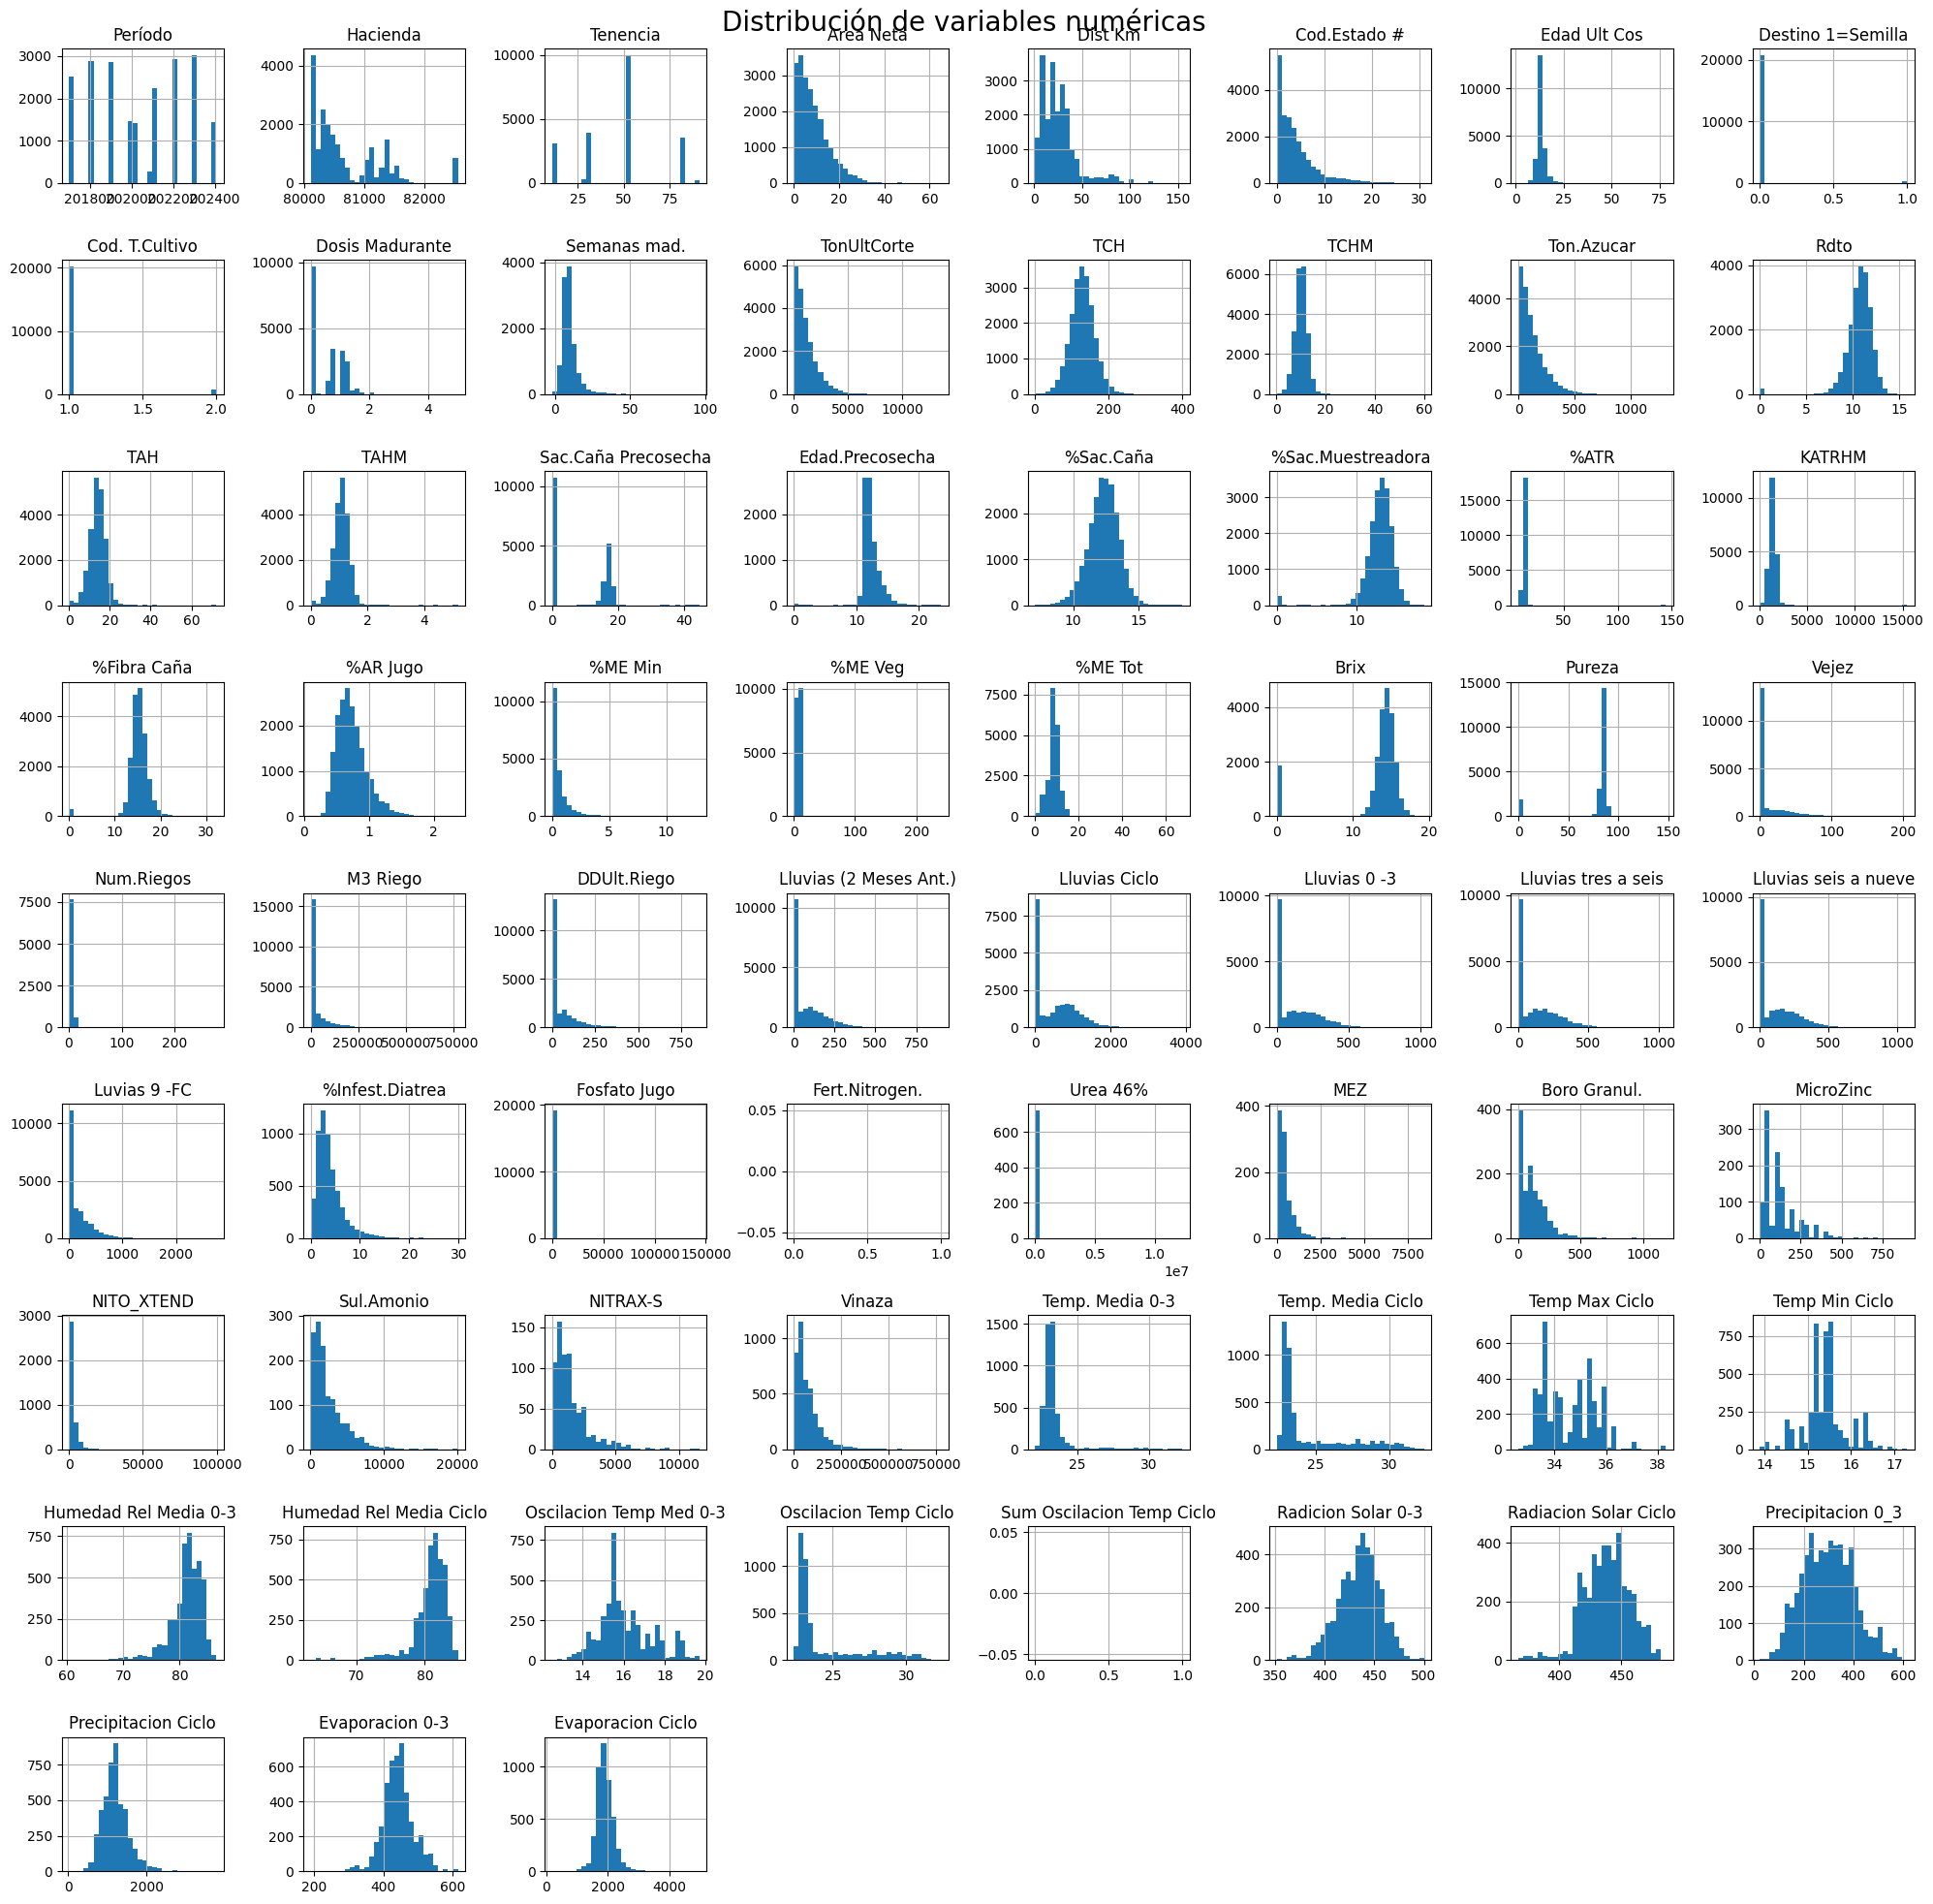

In [7]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

---
### **Limpieza: Identificadores** 

Limpieza de variables como `Periodo`, `Hacienda`, `Nombre`, `Suerte`, `Cod.Estado`, `F.Siembra` debido a posible data leakage o variables que no aportan prediccion porque pueden hacer las veces de identificadores más que de predictores. 

In [8]:
REDUNDANT_FEATURES = ['Período', 'Hacienda', 'Nombre', 'Suelo',  'Suerte', 'Cod.Estado', 'F.Siembra', 'Ult.Riego', 'Cerca de', 'Cultivo']
df = df.drop(columns = REDUNDANT_FEATURES)

---
### **Matrices de Correlación**  
Matrices de correlación orientadas a TCH y %Sac.Caña, al igual que matriz de correlación general

In [9]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns

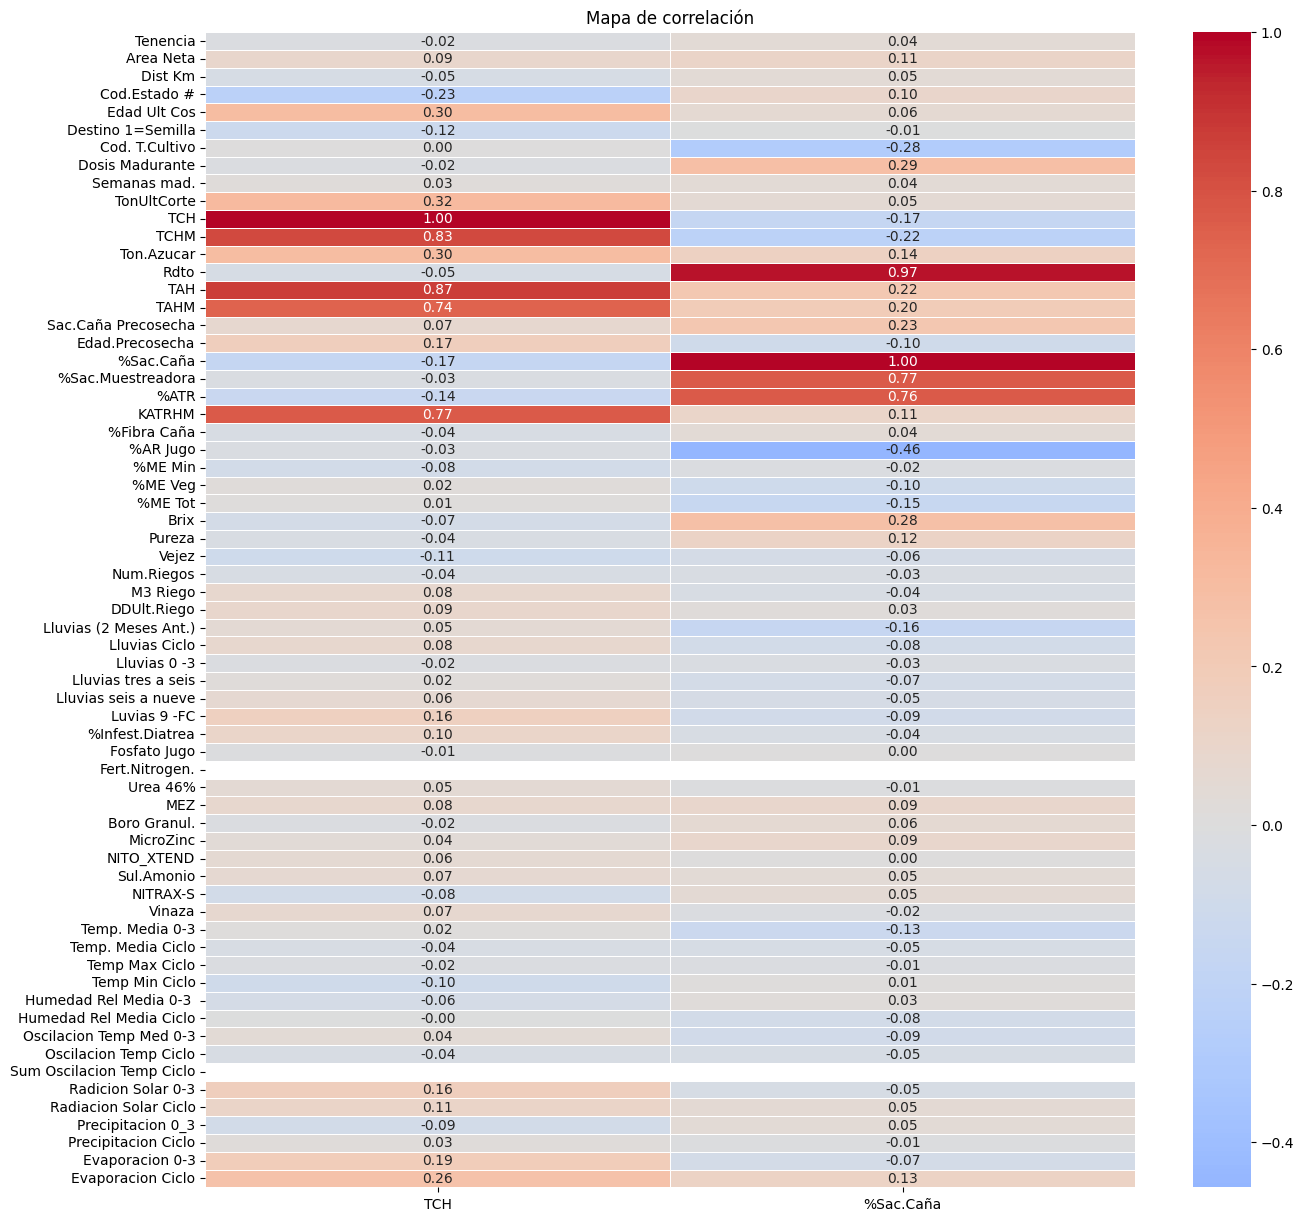

In [10]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

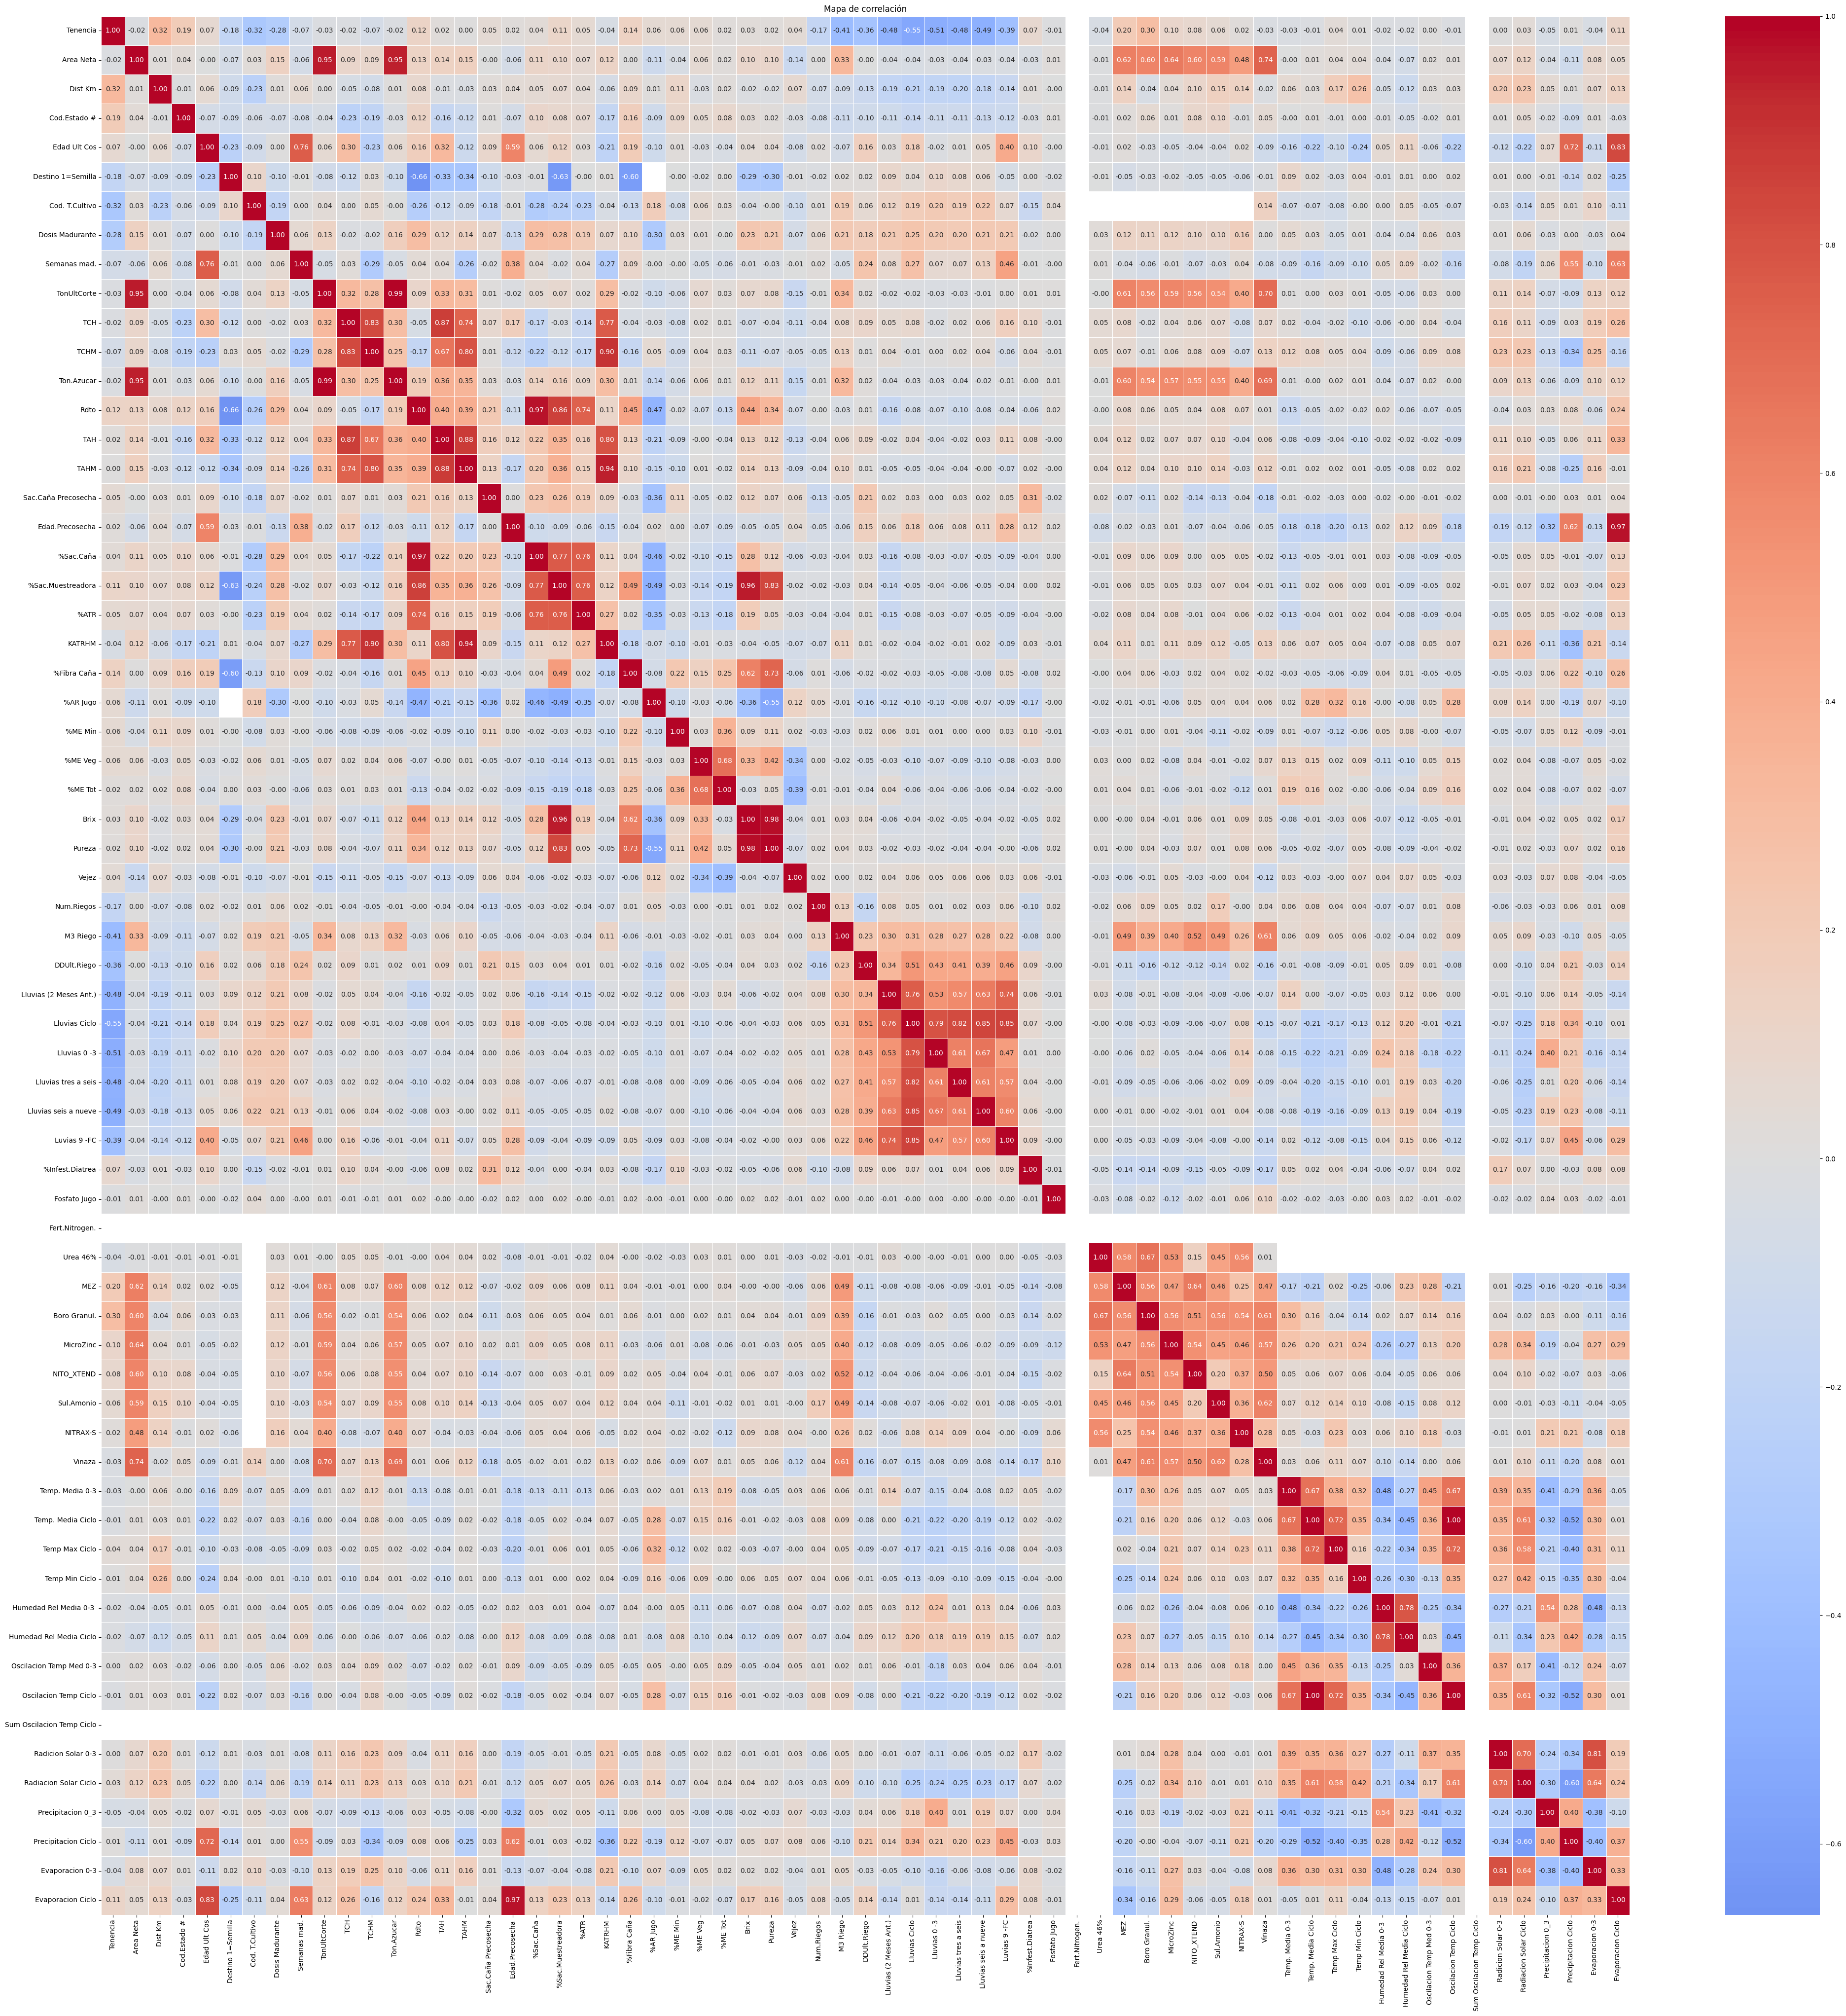

In [11]:
plt.figure(figsize=(50,50))
sns.heatmap(numerical_corr, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Se observa multicolinealidad entre algunas variables al igual que altas correlaciones entre variable objetivo y posibles leaks. 

---
### **Limpieza: Leakage para TCH**
Se eliminan variables que se obtienen despues de la cosecha de la caña y que no influyen en la predicción de TCH. 

In [12]:
TCH_LEAKAGE = ['TonUltCorte', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Tot', 'Brix', 'Pureza', 'TCHM']

df = df.drop(columns = TCH_LEAKAGE)

---
### **Limpieza: Variables de Riego**  
Se revisan features relacionadas con riego para eliminar multicolinealidad

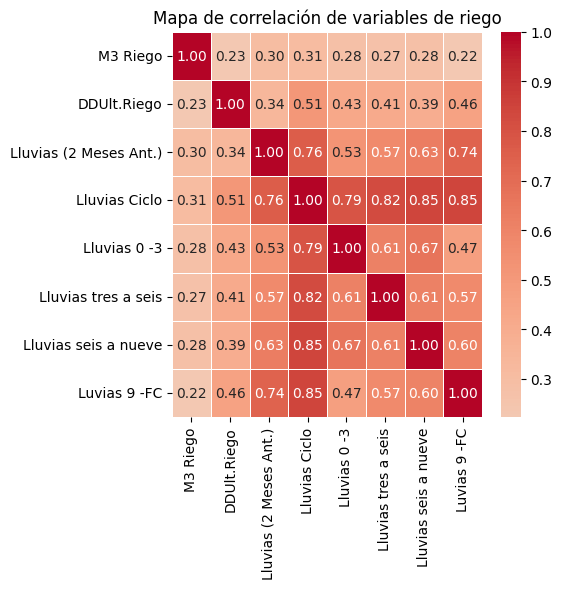

In [13]:
IRRIGATION_FEATURES = ['M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']

plt.figure(figsize=(5,5))
numerical_irrig_df = df[IRRIGATION_FEATURES]
irrig_corr = numerical_irrig_df.corr()
sns.heatmap(irrig_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables de riego")
plt.show()

In [14]:
IRRIGATION_DEPURE = ['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']
IRRIGATION_FEATURES = [f for f in IRRIGATION_FEATURES if f not in IRRIGATION_DEPURE]
df = df.drop(columns = IRRIGATION_DEPURE)
df[IRRIGATION_FEATURES]

M3 Riego  DDUlt.Riego  Lluvias Ciclo
0           0.00            0         1038.0
1           0.00            0            0.0
2       48513.60          107         1002.0
3           0.00            0            0.0
4           0.00            0          991.0
...          ...          ...            ...
21022   16605.96           27         1123.0
21023    6435.60           25         1139.0
21024    9564.96           25         1139.0
21025  289740.00           40          905.0
21026    7440.90           76          921.0

[21027 rows x 3 columns]

---
### **Limpieza: Variables del clima**  
Se revisan variables relacionadas del clima por si existe alguna multicolinealidad entre las mismas

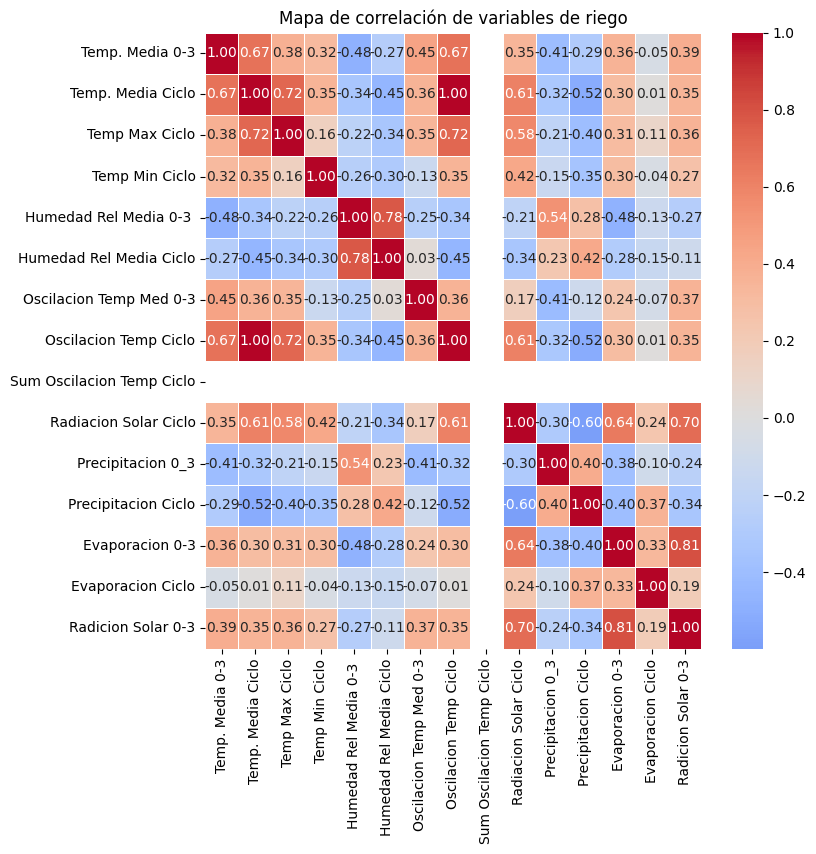

In [15]:
WEATHERING_FEATURES = ['Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo', 'Radicion Solar 0-3']

plt.figure(figsize=(8,8))
numerical_weathering_df = df[WEATHERING_FEATURES]
weathering_corr = numerical_weathering_df.corr()
sns.heatmap(weathering_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables de riego")
plt.show()



In [16]:
WEATHERING_DEPURE = ['Temp. Media 0-3', 'Humedad Rel Media 0-3 ', 'Oscilacion Temp Med 0-3', 'Sum Oscilacion Temp Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Radicion Solar 0-3']
WEATHERING_FEATURES = [f for f in WEATHERING_FEATURES if f not in WEATHERING_DEPURE]
df = df.drop(columns = WEATHERING_DEPURE)
df[WEATHERING_FEATURES]

Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  \
0                    NaN             NaN             NaN   
1                    NaN             NaN             NaN   
2                    NaN             NaN             NaN   
3                    NaN             NaN             NaN   
4                    NaN             NaN             NaN   
...                  ...             ...             ...   
21022             31.089            35.4            16.6   
21023             30.945            35.4            16.6   
21024             30.945            35.4            16.6   
21025             31.040            35.4            16.6   
21026             30.890            35.4            16.6   

       Humedad Rel Media Ciclo  Oscilacion Temp Ciclo  Radiacion Solar Ciclo  \
0                          NaN                    NaN                    NaN   
1                          NaN                    NaN                    NaN   
2                          NaN                    NaN                    NaN   
3                          NaN                    NaN                    NaN   
4                          NaN                    NaN                    NaN   
...                        ...                    ...                    ...   
21022                   78.797                 31.089                444.382   
21023                   78.704                 30.945                444.528   
21024                   78.704                 30.945                444.528   
21025                   78.720                 31.040                444.839   
21026                   78.687                 30.890                444.372   

       Evaporacion Ciclo  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
21022             1824.6  
21023             1867.2  
21024             1867.2  
21025             1843.9  
21026             1881.2  

[21027 rows x 7 columns]

---
### **Distribución de TCH**

In [17]:
df['TCH'].describe()

count    21027.000000
mean       129.608509
std         32.846029
min          1.573653
25%        108.691426
50%        129.479600
75%        150.407607
max        401.045947
Name: TCH, dtype: float64

<Axes: >

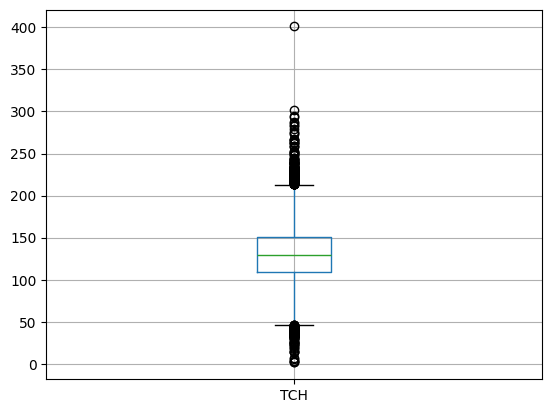

In [18]:
df.boxplot(column=['TCH'])

In [19]:
Q1 = df['TCH'].quantile(0.25)
Q3 = df['TCH'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar
df_sin_outliers = df[
    (df['TCH'] >= limite_inferior) & 
    (df['TCH'] <= limite_superior)
]

<Axes: >

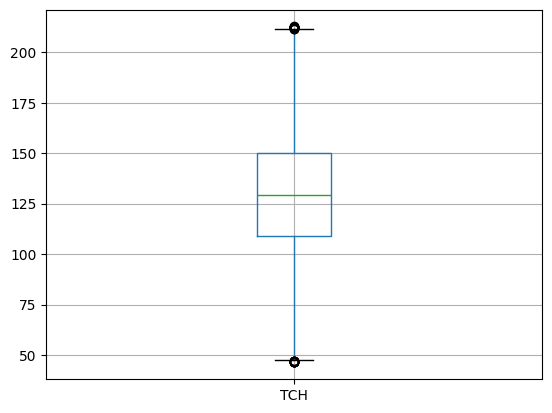

In [23]:
df_sin_outliers.boxplot(column=['TCH'])

In [20]:
df_sin_outliers.shape

(20723, 45)

#### **Porcentaje de Nulos**

In [21]:
null_percent = df_sin_outliers.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Fert.Nitrogen.             100.000000
Urea 46%                    96.544902
NITRAX-S                    96.414612
MEZ                         95.367466
MicroZinc                   94.508517
Boro Granul.                93.871544
Sul.Amonio                  93.490325
NITO_XTEND                  82.396371
Vinaza                      80.384114
Radiacion Solar Ciclo       78.395985
Oscilacion Temp Ciclo       78.395985
Evaporacion Ciclo           78.395985
Humedad Rel Media Ciclo     78.395985
Temp Max Ciclo              78.395985
Temp Min Ciclo              78.395985
Temp. Media Ciclo           78.395985
%Infest.Diatrea             73.208512
Codigo Estacion             70.042947
D.S.                        65.796458
Num.Riegos                  59.764513
Edad.Precosecha             57.588187
Producto                    46.055108
Semanas mad.                46.040631
Fec.Madur.                  46.040631
Vejez                       11.533079
Fosfato Jugo                 8.743908
%ME Veg     

In [22]:
PRODUCTS_FEATURES = ['Fert.Nitrogen.', 'Urea 46%', 'NITRAX-S', 'MEZ', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio', 'NITO_XTEND', 'Vinaza']
df_sin_outliers = df_sin_outliers.drop(columns = PRODUCTS_FEATURES)

In [23]:
df_sin_outliers = df_sin_outliers.drop(columns=WEATHERING_FEATURES)

In [ ]:
df_sin_outliers = df_sin_outliers['%Infest.Diatrea'].fillna(0)

In [ ]:
df_sin_outliers = df_sin_outliers.drop(columns = ['Codigo Estacion'])

In [ ]:
df_sin_outliers = df_sin_outliers.drop(columns = ['D.S.'])

In [ ]:
df_sin_outliers = df_sin_outliers.drop(columns= ['Num.Riegos'])

In [24]:
null_percent = df_sin_outliers.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

%Infest.Diatrea      73.208512
Codigo Estacion      70.042947
D.S.                 65.796458
Num.Riegos           59.764513
Edad.Precosecha      57.588187
Producto             46.055108
Fec.Madur.           46.040631
Semanas mad.         46.040631
Vejez                11.533079
Fosfato Jugo          8.743908
%ME Veg               8.034551
Dosis Madurante       0.492207
Dist Km               0.019302
Cod. T.Cultivo        0.009651
Tenencia              0.004826
Edad Ult Cos          0.000000
Cod.Estado #          0.000000
Area Neta             0.000000
Zona                  0.000000
Variedad              0.000000
F.Ult.Corte           0.000000
Destino 1=Semilla     0.000000
T.Corte               0.000000
TCH                   0.000000
Tipo Quema            0.000000
DDUlt.Riego           0.000000
M3 Riego              0.000000
Cosechó               0.000000
Lluvias Ciclo         0.000000
dtype: float64

#### **Columnas Vacías**

Eliminamos columnas vacías del Df y aquellas que generan mucho ruido (HACIENDA), identificadores de cada hacienda. 


In [ ]:
COLUMNS_TO_DROP = ['Sum Oscilacion Temp Ciclo', 'Fert.Nitrogen.', 'Hacienda']
df = df.drop(columns = COLUMNS_TO_DROP)

#### **Chem Features**

Se observan columnas con porcentajes de nulos demasiado altos [99% - 80%]. Parecen columnas relacionadas a productos o químicos que se utilizaron en la plantación, su ausencia podría indicar que el producto no se usó. Se imputarán con 0's. 


In [ ]:
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

In [ ]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Precipitacion Ciclo        78.456271
Precipitacion 0_3          78.456271
Temp Max Ciclo             78.456271
Temp Min Ciclo             78.456271
Oscilacion Temp Med 0-3    78.456271
Oscilacion Temp Ciclo      78.456271
Radiacion Solar Ciclo      78.456271
Radicion Solar 0-3         78.456271
Evaporacion Ciclo          78.456271
Evaporacion 0-3            78.456271
dtype: float64

#### **Weather Features - Variables Climaticas**
Se observa un porcentaje en común con variables relacionadas con condiciones climáticas (78.456271%) por esa razón, se procede a agruparlas en la categoría de weather features. Por el momento se dejan agrupadas

In [ ]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']

#### **Analisis de Correlaciones**

Matrices de correlación orientadas a **variables objetivo** y general

In [ ]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Tenencia', 'Area Neta', 'Dist Km', 'Cod.Estado #',
       'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Urea 46%', 'MEZ', 'Boro Granul.',
       'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza',
       'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo',
       'Radicion Solar 0

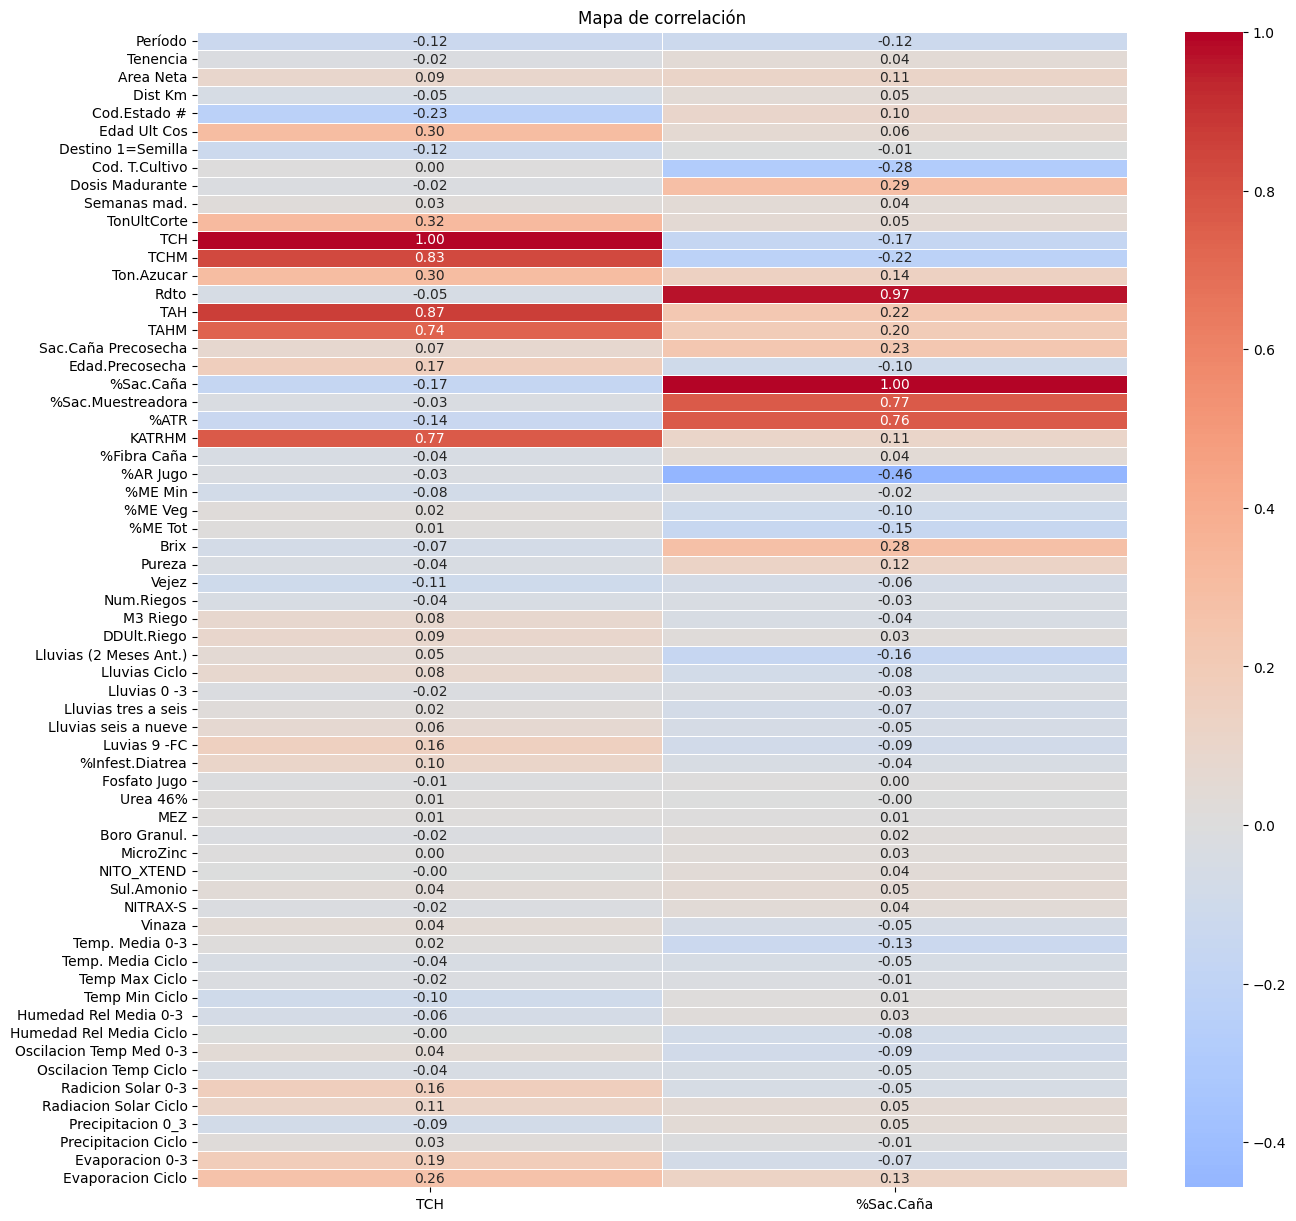

In [ ]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

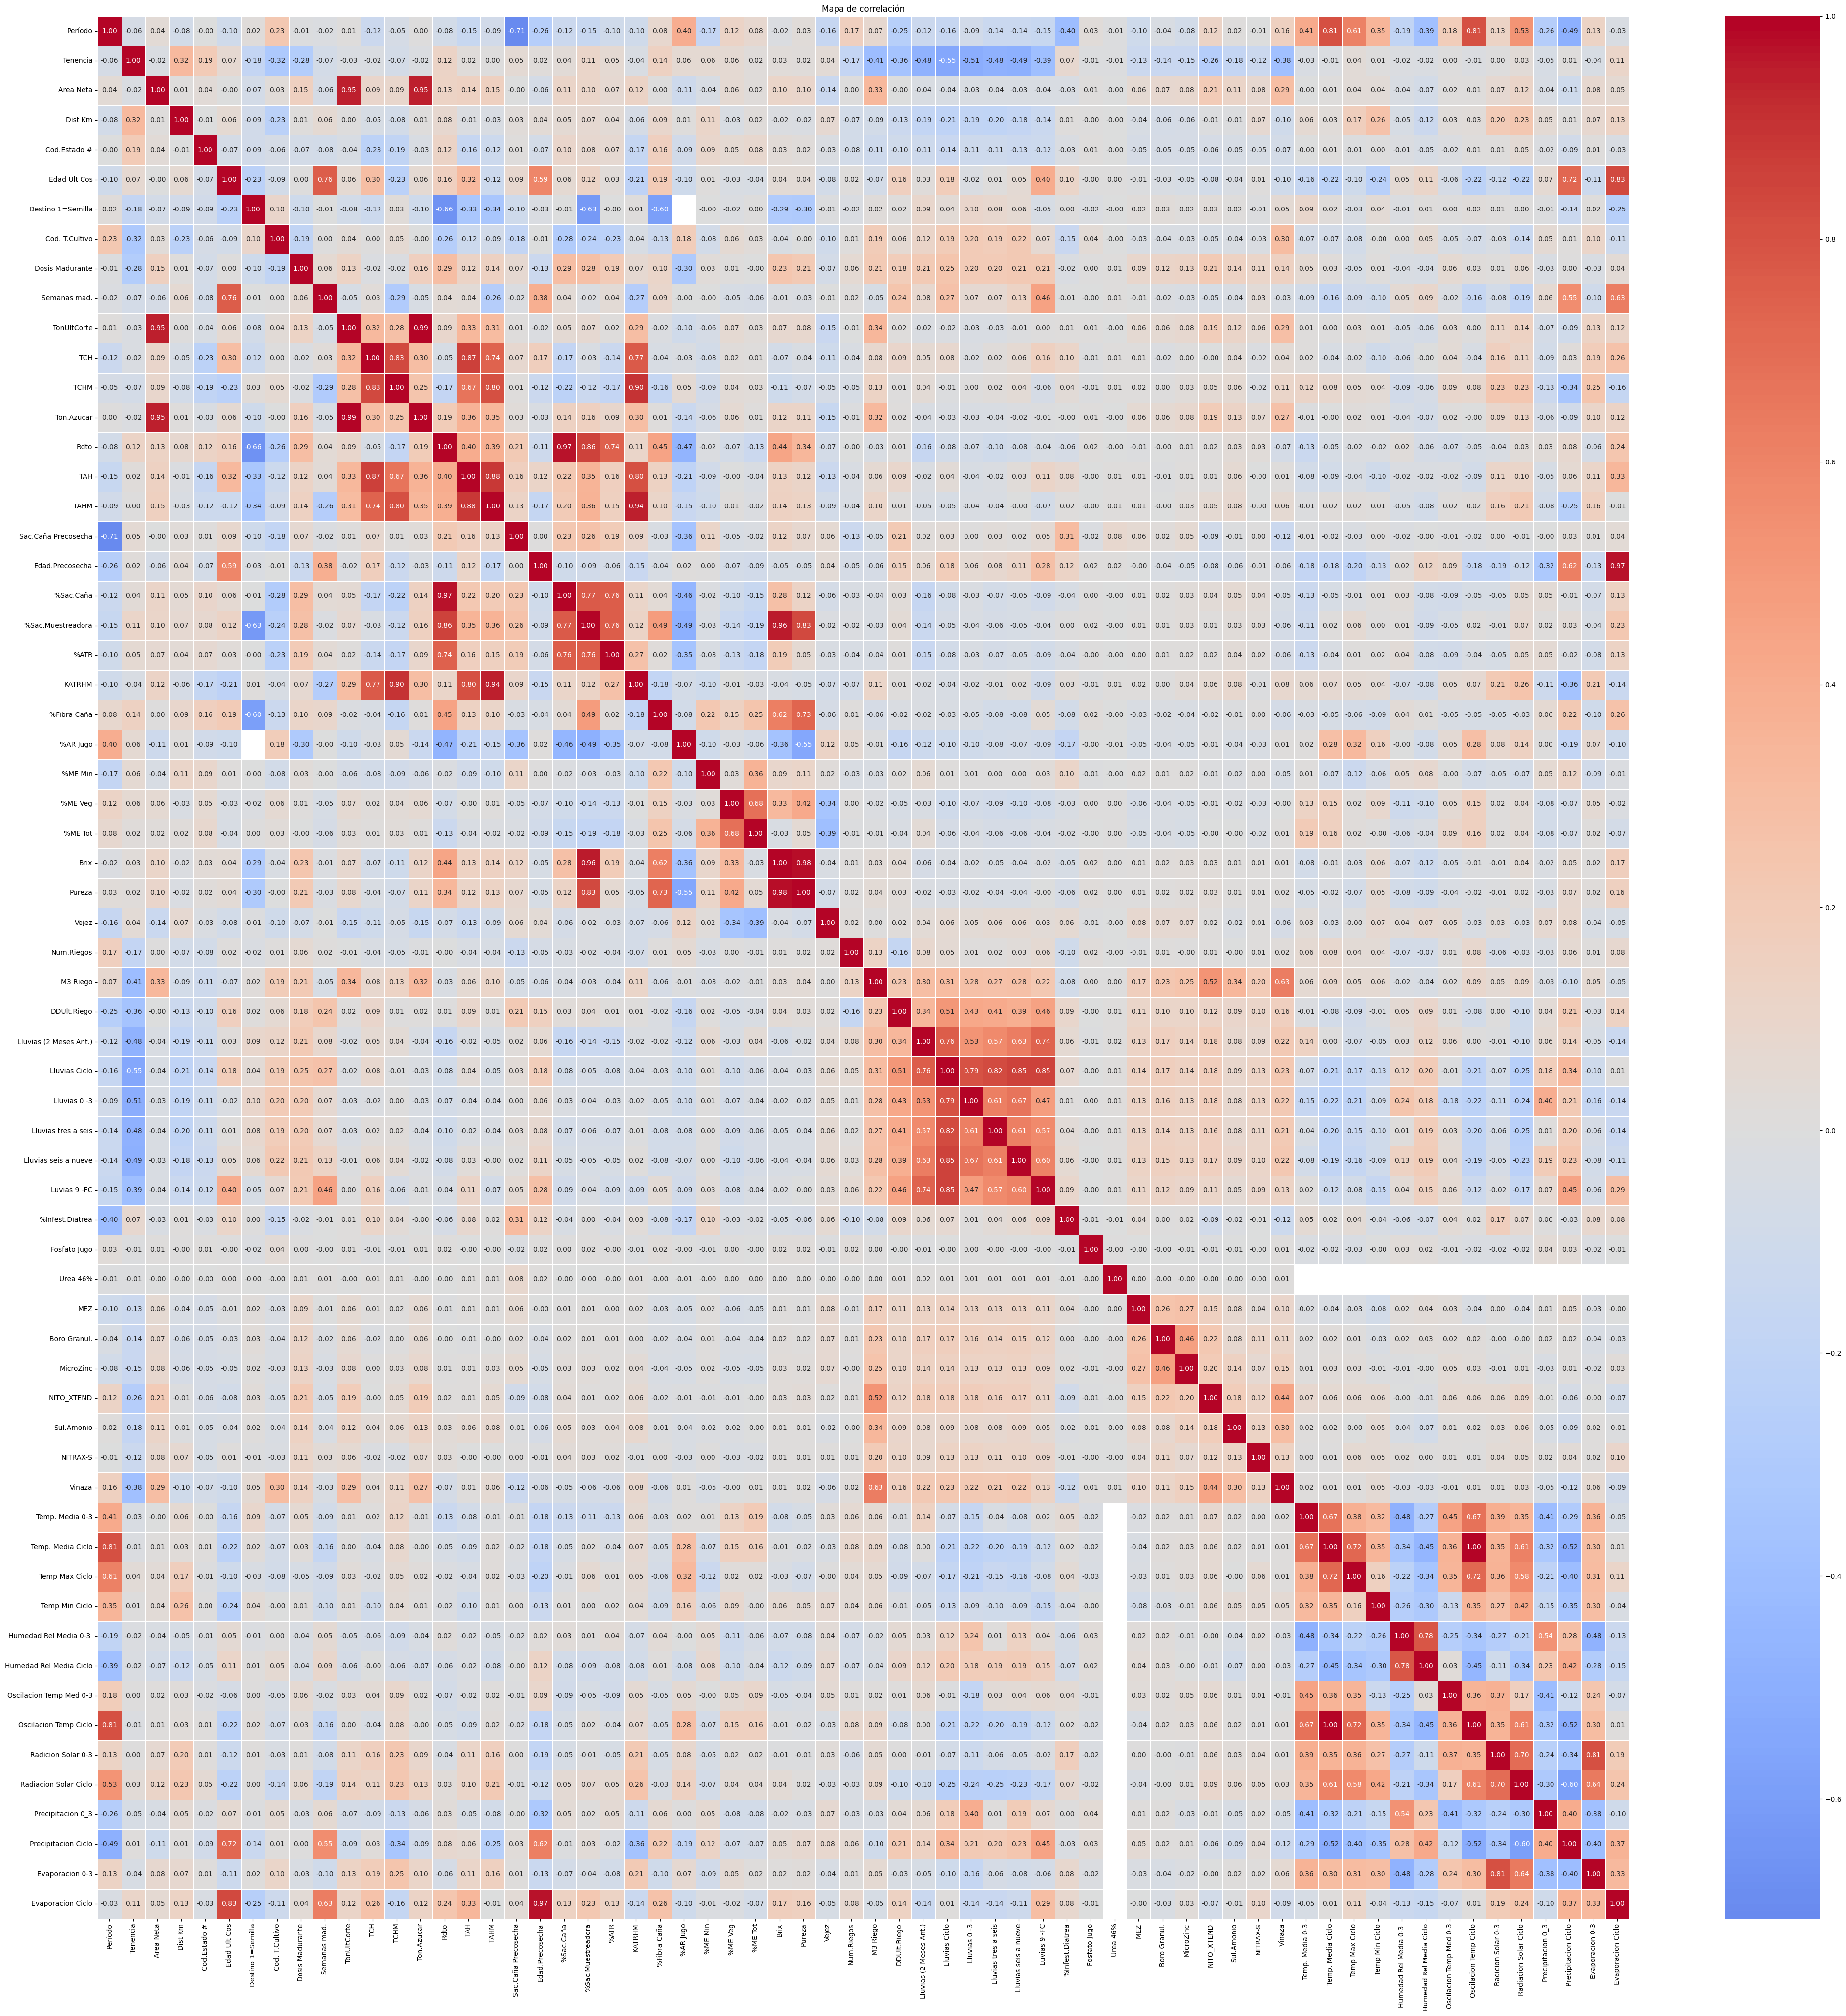

In [ ]:
## Subset 
plt.figure(figsize=(50,50))
sns.heatmap(numerical_corr, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Posible multicolinealidad entre: 
- `TCH` y `TCHM` 
- `TAH` y `TAHM`
- `Brix` y `Pureza`
- `Edad precosecha` y `Evaporación Ciclo`
- `Oscilación Temp Ciclo` y `Temp Media Ciclo`

Se sugiere eliminar además variables que están altamente correlacionadas con la variable objetivo, posiblemente porque son métricas que se tomaron ya luego del cultivo, variables resultado. 

#### **Data Leakage**

In [ ]:
LEAKAGE = [
    'TCHM','Ton.Azucar','Rdto','TAH','TAHM',
    '%Sac.Muestreadora','%ATR','KATRHM','Brix','Pureza',
    '%AR Jugo','%Fibra Caña','Sac.Caña Precosecha','%ME Min','%ME Veg','%ME Tot',
    'TonUltCorte', 'Fosfato Jugo'
]

In [ ]:
df_mod = df.drop(columns=LEAKAGE)

#### **Irrigation Features**

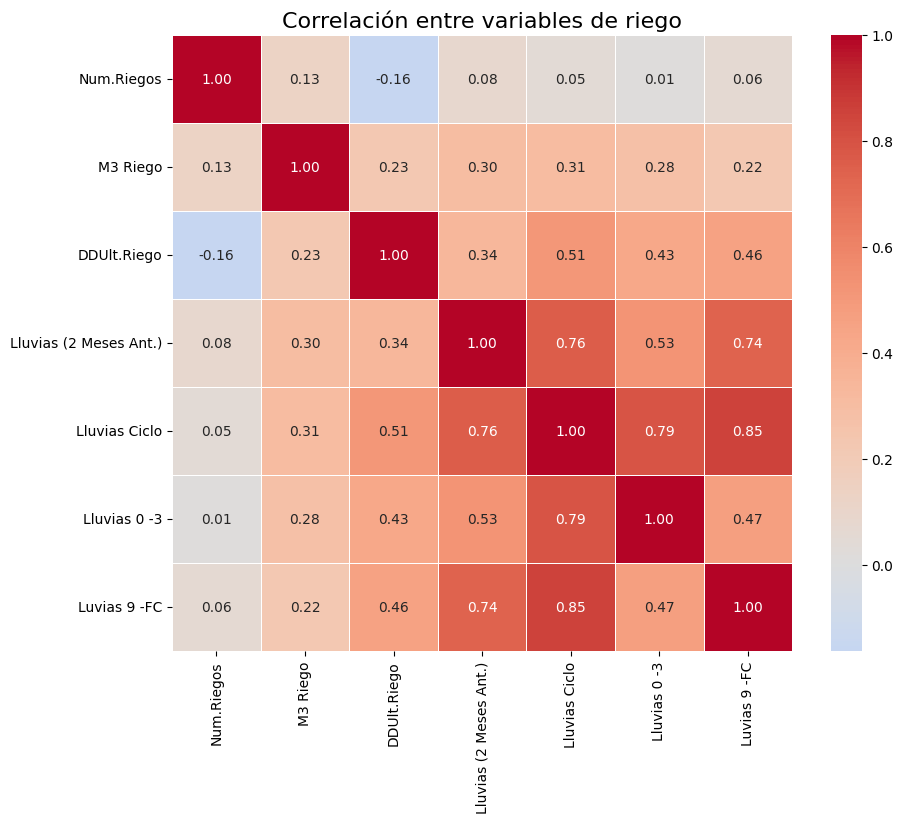

In [ ]:
NUMERICAL_FEATURES = df_mod.select_dtypes(include=["int64", "float64"]).columns
IRRIG_FEATURES = ['Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Luvias 9 -FC']
corr_matrix_irrig = df_mod[IRRIG_FEATURES].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_irrig, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables de riego", fontsize=16)
plt.show()

No se observan correlaciones extremadamente altas (0.95 - 0.99). Se mantienen por ahora las variables de riego

#### **Correlación en variables del clima**

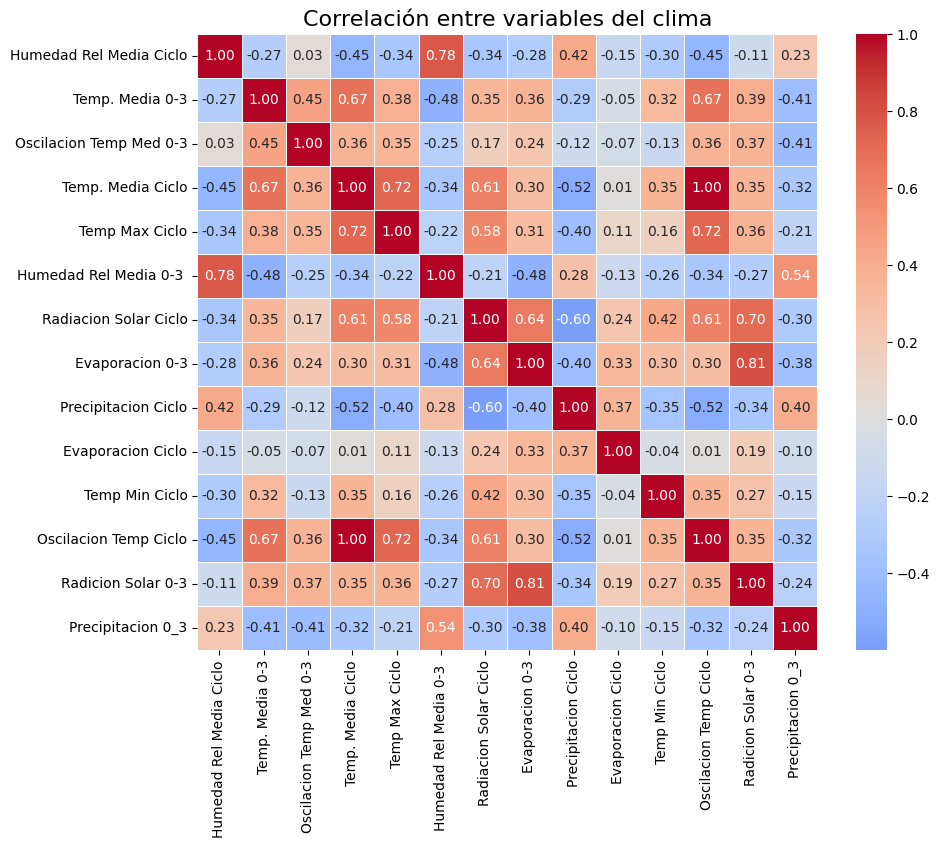

In [ ]:
corr_matrix_weather = df_mod[WEATHER_FEATURES].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_weather, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables del clima", fontsize=16)
plt.show()

In [ ]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']
df_mod = df_mod.drop(columns = ['Oscilacion Temp Ciclo'])

Se elimina Oscilacion Temp Ciclo debido a que comparte la misma correlación con Temp. Media Ciclo, es decir, son la misma variable o tienen los mismos registros. 

--- 
#### **Evaluación y preprocesamiento General**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer

# ======================
# 1. Separar X e y
# ======================
X = df_mod.drop(columns=['TCH', '%Sac.Caña']) 
y = df_mod['TCH']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# 2. Identificar features
# ======================
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

print("Numéricas:", len(numerical_features))
print("Categóricas:", len(categorical_features))

# ======================
# 3. Transformadores
# ======================
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # imputar nulos con media
    ('scaler', StandardScaler())                   # escalar
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # imputar nulos con moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # one-hot encoding
])

# ======================
# 4. Preprocessors
# ======================

# Solo numéricas
preprocessor_num = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)
    ]
)

# Numéricas + categóricas
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ======================
# 5. Pipelines
# ======================
pipeline_lr_num = Pipeline(steps=[
    ('preprocessor', preprocessor_num),
    ('regressor', LinearRegression())
])

pipeline_lr_all = Pipeline(steps=[
    ('preprocessor', preprocessor_all),
    ('regressor', LinearRegression())
])

# ======================
# 6. Validación cruzada
# ======================
print("\n--- Regresión Lineal SOLO Numéricas ---")
cv_scores_num_mse = -cross_val_score(pipeline_lr_num, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_num_r2 = cross_val_score(pipeline_lr_num, X_train, y_train, cv=5, scoring='r2')
print(f"MSE promedio: {np.mean(cv_scores_num_mse):.4f} (+/- {np.std(cv_scores_num_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_num_r2):.4f} (+/- {np.std(cv_scores_num_r2):.4f})")

print("\n--- Regresión Lineal Numéricas + Categóricas ---")
cv_scores_all_mse = -cross_val_score(pipeline_lr_all, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_all_r2 = cross_val_score(pipeline_lr_all, X_train, y_train, cv=5, scoring='r2')
print(f"MSE promedio: {np.mean(cv_scores_all_mse):.4f} (+/- {np.std(cv_scores_all_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_all_r2):.4f} (+/- {np.std(cv_scores_all_r2):.4f})")

Numéricas: 43
Categóricas: 14

--- Regresión Lineal SOLO Numéricas ---
MSE promedio: 843.2076 (+/- 34.7867)
R^2 promedio: 0.2120 (+/- 0.0228)

--- Regresión Lineal Numéricas + Categóricas ---
MSE promedio: 604.9094 (+/- 40.8431)
R^2 promedio: 0.4348 (+/- 0.0340)


In [ ]:
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor_all),
                                 ('regressor', Ridge())])

pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor_all),
                                 ('regressor', Lasso())]) 

# ======================
# 5. GridSearch
# ======================
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=3,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=3,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# ======================
# 6. Resultados
# ======================
print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_ridge.best_estimator_.score(X_train, y_train):.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_lasso.best_estimator_.score(X_train, y_train):.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 3.0539
Mejor MSE (CV): 556.3021
Mejor R² (CV): 0.5827

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0038
Mejor MSE (CV): 570.2154
Mejor R² (CV): 0.5566



--- Características más importantes según Lasso ---
                          Característica  Coeficiente    abs_coef
624   cat__Nombre_MADROÑAL CASAS INCAUCA   105.576601  105.576601
1882                    cat__Suerte_512B    74.016611   74.016611
1145                    cat__Suerte_035D   -63.606610   63.606610
1101                    cat__Suerte_026D    58.107602   58.107602
1301                    cat__Suerte_073A    57.798985   57.798985
1012                    cat__Suerte_010G    55.006229   55.006229
182            cat__Nombre_EL CASTILLITO   -54.711746   54.711746
337      cat__Nombre_HATO VIEJO PICHICHI   -50.481136   50.481136
802       cat__Nombre_SAN MIGUEL EMPRESA   -46.347799   46.347799
224              cat__Nombre_EL LIBANO 4   -45.517125   45.517125
309                   cat__Nombre_FATIMA    45.265918   45.265918
2019                     cat__Suerte_800   -43.366837   43.366837
735               cat__Nombre_QUITASUE?O   -43.141413   43.141413
278             cat__No

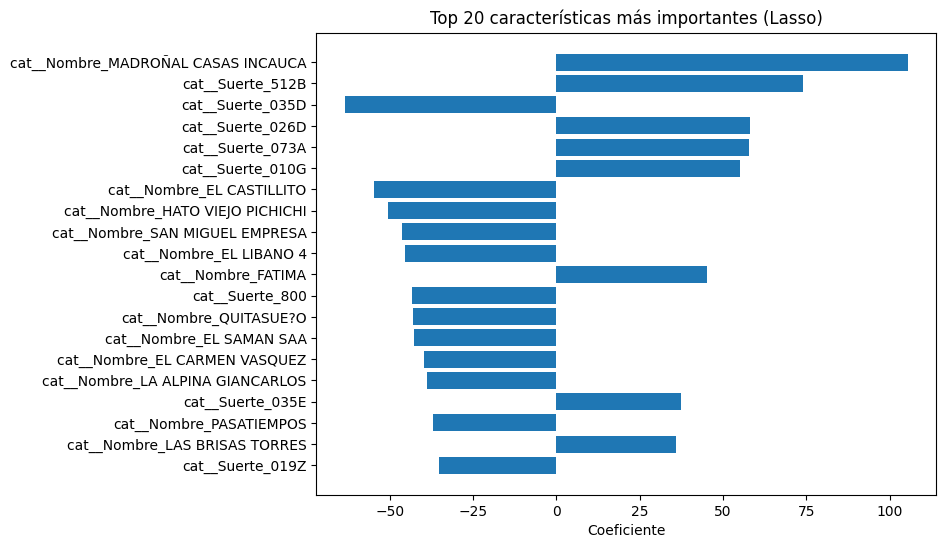


--- Características más influyentes según Ridge ---
                          Característica  Coeficiente   abs_coef
182            cat__Nombre_EL CASTILLITO   -50.564676  50.564676
1882                    cat__Suerte_512B    47.304442  47.304442
1145                    cat__Suerte_035D   -45.870266  45.870266
1101                    cat__Suerte_026D    42.944575  42.944575
802       cat__Nombre_SAN MIGUEL EMPRESA   -42.767930  42.767930
309                   cat__Nombre_FATIMA    39.893079  39.893079
735               cat__Nombre_QUITASUE?O   -38.527061  38.527061
624   cat__Nombre_MADROÑAL CASAS INCAUCA    36.240168  36.240168
224              cat__Nombre_EL LIBANO 4   -34.673893  34.673893
177                cat__Nombre_EL CARMEN    34.448330  34.448330
1146                    cat__Suerte_035E    33.333869  33.333869
1301                    cat__Suerte_073A    32.915984  32.915984
627                  cat__Nombre_MALABAR   -32.637932  32.637932
2019                     cat__Suerte_

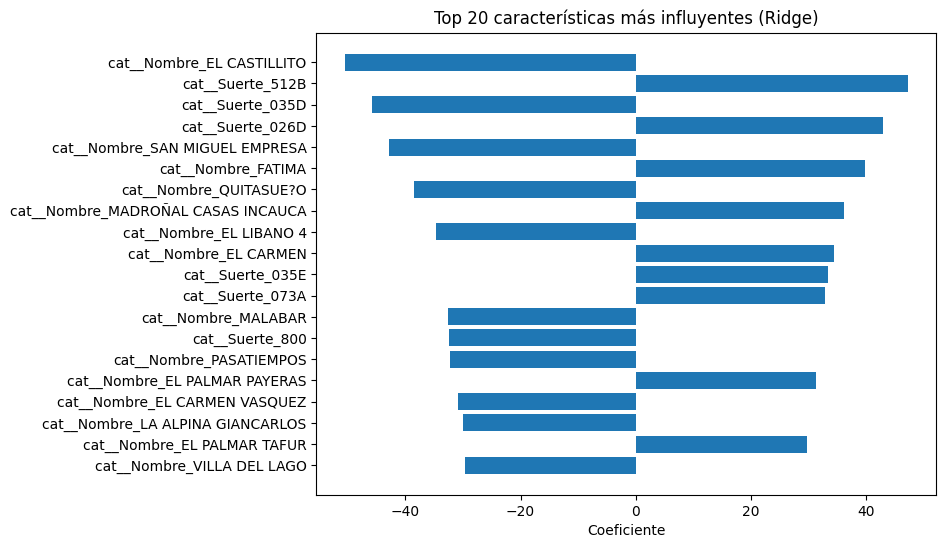

In [ ]:
best_lasso_model = grid_search_lasso.best_estimator_
lasso_feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()
lasso_coeffs = best_lasso_model.named_steps['regressor'].coef_

df_lasso = pd.DataFrame({
    'Característica': lasso_feature_names,
    'Coeficiente': lasso_coeffs
})

# Filtramos las que Lasso mantuvo (coef != 0)
significant_lasso = df_lasso[df_lasso['Coeficiente'] != 0] \
    .assign(abs_coef=lambda d: d['Coeficiente'].abs()) \
    .sort_values(by='abs_coef', ascending=False)

print("\n--- Características más importantes según Lasso ---")
print(significant_lasso.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(significant_lasso.head(20)['Característica'],
         significant_lasso.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más importantes (Lasso)")
plt.xlabel("Coeficiente")
plt.show()


# --- Ridge ---
best_ridge_model = grid_search_ridge.best_estimator_
ridge_feature_names = best_ridge_model.named_steps['preprocessor'].get_feature_names_out()
ridge_coeffs = best_ridge_model.named_steps['regressor'].coef_

df_ridge = pd.DataFrame({
    'Característica': ridge_feature_names,
    'Coeficiente': ridge_coeffs,
    'abs_coef': abs(ridge_coeffs)
}).sort_values(by='abs_coef', ascending=False)

print("\n--- Características más influyentes según Ridge ---")
print(df_ridge.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(df_ridge.head(20)['Característica'],
         df_ridge.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más influyentes (Ridge)")
plt.xlabel("Coeficiente")
plt.show()